In [1]:
import numpy as np
import random
import os
import tensorflow as tf
from preprocessor import Preprocessor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from test_models import load_model, test_random_line

In [2]:
# preprocessor_path = "../data/preprocessors/preprocessor_20_smallest_files_100lpc_20ws_BERTencx16.zip"
preprocessor_path = "../data/preprocessors/preprocessor_3_newest_files_100lpc_20ws_BERTencx16.zip"
pp = Preprocessor.load(preprocessor_path)
print(pp.data.states_counts)
X, y = pp.data.as_xy_arrays()

defaultdict(<class 'int'>, {np.int64(0): 100, np.int64(3): 100, np.int64(2): 100, np.int64(1): 30})


In [9]:
# m_name = "../models/vary_lstm/lstm_1x50_drop0.0_rec0.0_lr0.001_bs32_ep1000_earlystpval_loss10True_20250624_145128"
m_name = "../models/lstm_2x50_drop0.1_rec0.1_lr0.001_bs32_ep1000_earlystpval_accuracy50True_20250708_112046"
model_path = f"{m_name}.keras"



# model_path = "../models/vary_lstm/lstm_50x100_drop0.0_rec0.0_lr0.001_bs32_ep1000_earlystpval_loss10True_20250630_062218.keras"
# model_path = "../models/vary_lstm/lstm_1x100_drop0.0_rec0.0_lr0.001_bs32_ep1000_earlystpval_loss10True_20250630_062041.keras"
#m_name = "transformer_8x128_heads4_ffdim256_drop0_lr0.001_bs32_ep1000_earlystpval_loss10True_20250619_140737"
#model_path = f"../models/vary_transformer_parameters/{m_name}.keras"

model = load_model(model_path)


In [10]:
# Get predictions
y_pred_probs = model.predict(X)
y_pred = y_pred_probs.argmax(axis=1)  # For softmax outputs

# True labels
y_true = y.argmax(axis=1) if y.ndim > 1 else y

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Accuracy : 0.5303
Precision: 0.5265
Recall   : 0.5303
F1 Score : 0.5043


d:\mgeo\projects\log-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


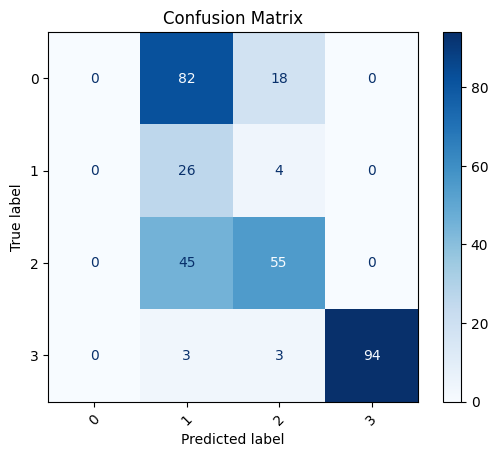

In [11]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.savefig(f"{m_name}_test-confusionmatrix.png")
plt.show()
